In [21]:
%reload_ext autoreload
%autoreload 2

from graph_active_learning_sy import *

from graph_utils import create_graph_hyp_space
from graph_active_learner import GraphActiveLearner

from itertools import combinations
from itertools import permutations

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Low noise case

In [22]:
hyp_space = create_graph_hyp_space(t=0.8, b=0.1)
basis = [hyp_space[hyps] for hyps in ["common_cause_1", "common_cause_2", "common_cause_3", 
                                     "common_effect_1", "common_effect_2", "common_effect_3",
                                     "causal_chain_1", "causal_chain_2", "causal_chain_3",
                                     "causal_chain_4", "causal_chain_5", "causal_chain_6"]]
print(type(basis))
print(len(basis))

<class 'list'>
12


In [28]:
basis_size = len(basis)
from scipy.special import comb
k = np.arange(2, basis_size+1)
n = np.array([basis_size]*(basis_size-1))
vec = comb(n, k, exact=False)
n_space = np.sum(vec)
print(n_space)

4083.0


In [29]:
count = 0
for n_concept in range(2, basis_size + 1):
    list_of_concepts_to_include = combinations(np.arange(basis_size), n_concept)
    for ind, concept_list in enumerate(list_of_concepts_to_include):
        count += 1
print(count)

4083


In [32]:
basis = np.array(basis)
basis_size = len(basis)
n_samp = 100
n_step = 6
concept_id_log = []
eig_perf_log = np.zeros([int(n_space*n_samp), n_step])
epg_perf_log = np.zeros([int(n_space*n_samp), n_step])
st_perf_log = np.zeros([int(n_space*n_samp), n_step])
count = 0
for n_concept in range(2, basis_size + 1):
    list_of_concepts_to_include = combinations(np.arange(basis_size), n_concept)
    for ind, concept_list in enumerate(list_of_concepts_to_include):
        concept_space = basis[list(concept_list)]
        concept_id_log.append(list(concept_list))
        for samp in range(n_samp):
            eig_perf_log[count,:] = average_performance(np.array(concept_space), method='eig', n_step=n_step)
            epg_perf_log[count,:] = average_performance(np.array(concept_space), method='epg', n_step=n_step)
            st_perf_log[count,:] = average_performance(np.array(concept_space), method='self-teach', n_step=n_step)
            count += 1
        print("Number of concept at {}; total simulated at this number is at {}".format(n_concept, ind+1), end='\r')

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


KeyboardInterrupt: 

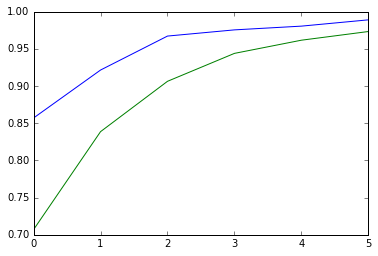

In [20]:
print(count)
plt.plot(eig_perf_log[1])
plt.hold(True)
plt.plot(st_perf_log[1])

In [18]:
judge = np.zeros(count)
for i in range(count):
    judge[i] = np.sum(eig_perf_log[i] - st_perf_log[i])

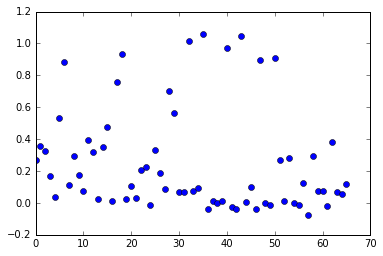

In [19]:
plt.plot(judge, 'o')